# Scientific Computing - mini-projet : Etude de la méthode de Newton

Pour ce mini-projet, on considére la méthode de Newton aussi appelée méthode de Newton-Raphtson. Cette méthode développée par Newton permet de trouver les racines réelles de polynômes. Elle possède des avantages et des inconveignents qui seront étudiés par la suite. Elle sera aussi comparée à d'autres méthodes numériques.

## Equation historique de Newton

Newton a trouvé sa méthode en se donnant pour objectif de résoudre l'équation suivante :


\begin{equation}
x^3 - 2x -5 = 0
\end{equation}


Dans un premier temps, on trace la fonction correspondante pour prouver qu'elle possède bien une unique solution réelle x comprise entre 2 et 2.2. On appellera par la suite cette fonction la fonction historique de Newton.

In [2]:
# On importe les librairies utilisées
import matplotlib.pyplot as plt
import numpy as np
import numpy.polynomial.polynomial as poly

In [3]:
# Definition de la fonction historique de Newton
def fhistoriquenewton(x):
    z = np.power(x,3)-2*x-5
    return z


In [4]:
# Definition d'une fonction permettant de tracer la fonction historique de Newton
def plot_function(x,func):
    plt.plot(x, func(x))
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.grid()
    plt.show()
    return

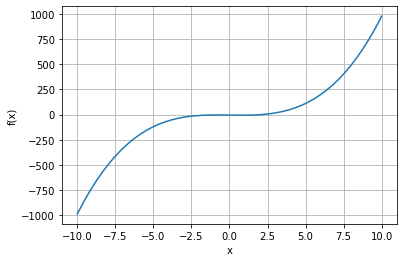

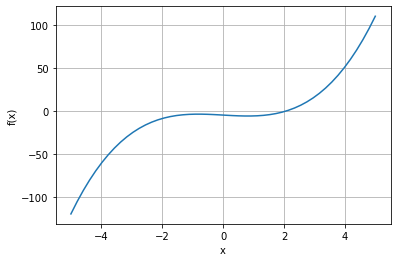

In [5]:
# On appelle la fonction plot_function pour représenter la fonction historique de Newton
plot_function(np.linspace(-10,10), fhistoriquenewton)
plot_function(np.linspace(-5,5), fhistoriquenewton)

Comme on peut le constater, la fonction ne s'annule qu'en un unique point x proche de la valeur 2.
                                

## Definition de la méthode de Newton

En principe, lorsque l'on s'approche d'une racine du polynome, la fonction est proche de zéro et tend vers zéro. On peut donc réaliser un développement limité en ce point.


On a :

\begin{equation}
f(x)\approx f(xo) + f'(xo)(x-xo)
\end{equation}



De plus, vu que l'on recherche les racines du polynome, c'est-à-dire les valeurs pour lesquelles la fonction s'annule, on peut poser :


\begin{equation}
f(x)= 0
\end{equation}

Ce qui donne : 

\begin{equation}
f(xo) + f'(xo)(x-xo)= 0
\end{equation}

On trouve alors une equation permettant de trouver une valeur de x :



\begin{equation}
x = xo - \frac{f(xo)}{f'(xo)}
\label{f1}
\end{equation}


En passant à l'algorithme, on obtient donc : 

\begin{equation}
x[i+1] = x[i] - \frac{f(x[i])}{f'(x[i])}
\label{f2}
\end{equation}


On peut constater que cette méthode permet de trouver par itération une nouvelle valeur de x s'approchant du point d'annulation de la fonction et qu'elle fait appel à la dérivée de la fonction. Il faut donc vérifier que la fonction dérivée ne s'annulle pas pendant le calcul. C'est l'une des conditions à toujours vérifier.

On va donc déterminer la fonction dérivée et la tracer pour trouver ses points d'annulation.

In [6]:
# Definition de la fonction dérivée de Newton
def fhistoriquenewton_derive(x):
    z = 3*np.power(x,2)-2
    return z

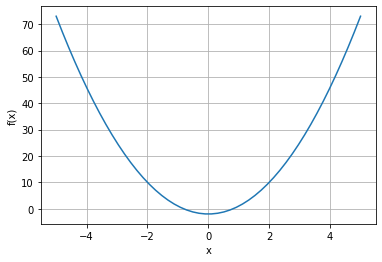

In [7]:
# Représentation de la fonction dérivée de Newton
plot_function(np.linspace(-5,5), fhistoriquenewton_derive)

La fonction dérivée est une parabole s'annulant deux fois à proximité de 1 et de -1. Il faut donc éviter, pour l'initialisation du calcul de passer à proximité de ces points. On va maintenant programmer l'algorithme de la méthode de Newton.

La méthode de Newton a pour intérêt de présenter une convergence quadratique d'ordre 2. Ce qui veut dire que la méthode converge très vite. Malheureusement, la méthode peut diverger et nécessite un point d'initialisation proche de la  racine. 

L'algorithme va donc prendre en argument, la fonction, sa dérivée ainsi qu'un point d'initialisatin du calcul. On ne va  effectuer que dix itérations : si le calcul n'a pas convergé au bout de dix itérations, on considera que le calcul ne converge pas.

In [8]:
# Defintition de l'algorithme de Newton
def methode_de_Newton(xo,func,funcderive):
    #initialisation de la méthode
    x = np.zeros(10)
    x[0] = xo
    for i in range(0,9):
        x[i+1] = x[i] - (func(x[i]))/(funcderive(x[i]))
        x[i] = x[i+1]
        #print("", x)
    return x

On applique la méthode en prenant un point d'initialisation de 2.

In [9]:
racinex = methode_de_Newton(2,fhistoriquenewton, fhistoriquenewton_derive)
print(racinex)

[2.1        2.09456812 2.09455148 2.09455148 2.09455148 2.09455148
 2.09455148 2.09455148 2.09455148 2.09455148]


On constate que la convergence est très rapide puisque la racine est atteinte en trois itérations seulement et le calcul ne bouge plus pas la suite.
La racine du polynôme vaut donc 2.09455148. On peut tester la méthode avec d'autres conditions initiales.

In [10]:
racinex = methode_de_Newton(5,fhistoriquenewton, fhistoriquenewton_derive)
print("", racinex)

 [3.49315068 2.60783576 2.19920927 2.10023666 2.09456959 2.09455148
 2.09455148 2.09455148 2.09455148 2.09455148]


En prenant comme condition initiale x=5, la convergence est atteinte au bout de six itérations.

In [11]:
racinex2 = methode_de_Newton(10,fhistoriquenewton, fhistoriquenewton_derive)
print("", racinex2)
racinex2 = methode_de_Newton(15,fhistoriquenewton, fhistoriquenewton_derive)
print("", racinex2)
racinex2 = methode_de_Newton(20,fhistoriquenewton, fhistoriquenewton_derive)
print("", racinex2)
racinex2 = methode_de_Newton(50,fhistoriquenewton, fhistoriquenewton_derive)
print("", racinex2)
racinex2 = methode_de_Newton(100,fhistoriquenewton, fhistoriquenewton_derive)
print("", racinex2)
racinex2 = methode_de_Newton(500,fhistoriquenewton, fhistoriquenewton_derive)
print("", racinex2)

 [6.72818792 4.58987071 3.24160814 2.47681935 2.15733795 2.09666362
 2.09455399 2.09455148 2.09455148 2.09455148]
 [10.0371471   6.75266006  4.60566091  3.25119245  2.48165501  2.15874334
  2.09675685  2.09455421  2.09455148  2.09455148]
 [13.35976628  8.94927591  6.03724813  4.14639949  2.97662981  2.34928903
  2.12483245  2.09505537  2.09455162  2.09455162]
 [33.34289144 22.24343184 14.85233556  9.9391503   6.68810656  4.56401974
  3.22593669  2.46894233  2.15507364  2.15507364]
 [66.67127809 44.45456093 29.6472187  19.78171257 13.21458056  8.85306298
  5.97412225  4.10614634  2.95304593  2.95304593]
 [333.33422889 222.2241676  148.15147883  98.77072851  65.85182326
  43.9083501   29.28322377  19.53928356  13.05334814  13.05334814]


En prenant des conditions initiales extrêmes pour les x positifs, la méthode semble tout de même toujours converger. On regarde maintenant comme les choses se passent pour les x négatifs.

In [12]:
racinex2 = methode_de_Newton(-2,fhistoriquenewton, fhistoriquenewton_derive)
print("", racinex2)
racinex2 = methode_de_Newton(-5,fhistoriquenewton, fhistoriquenewton_derive)
print("", racinex2)
racinex2 = methode_de_Newton(-10,fhistoriquenewton, fhistoriquenewton_derive)
print("", racinex2)
racinex2 = methode_de_Newton(-15,fhistoriquenewton, fhistoriquenewton_derive)
print("", racinex2)
racinex2 = methode_de_Newton(-50,fhistoriquenewton, fhistoriquenewton_derive)
print("", racinex2)
racinex2 = methode_de_Newton(-100,fhistoriquenewton, fhistoriquenewton_derive)
print("", racinex2)

 [-1.1         1.43435583  2.61305869  2.20102928  2.10042813  2.09457083
  2.09455148  2.09455148  2.09455148  2.09455148]
 [-3.35616438 -2.22092549 -1.32130766  0.11934279 -2.55631296 -1.61379942
 -0.58588778 -4.73896114 -3.17947798 -3.17947798]
 [-6.69463087 -4.49272899 -3.01206539 -1.96902671 -1.06612834  1.82738789
  2.14573185  2.09596759  2.09455261  2.09455261]
 [-10.02228826  -6.70946392  -4.50263345  -3.01881602  -1.97407039
  -1.0717027    1.75576132   2.1833277    2.09869124   2.09869124]
 [-33.34155775 -22.23954305 -14.84299914  -9.91777877  -6.63991144
  -4.45618738  -2.98714624  -1.95036606  -1.0452964   -1.0452964 ]
 [-66.67094473 -44.45358872 -29.64488344 -19.77636137 -13.20248409
  -8.82585054  -5.91311134  -3.97010433  -2.65321676  -2.65321676]


On constate qu'en prenant des x négatifs, la solution peut converger mais qu'elle peut aussi diverger en fonction des cas.

On a pu constater grâce aux exemples ci-dessus, que la méthode de Newton permet de converger très rapidement vers la solution, quand la méthode converge grâce à sa convergence quadratique.

Cependant, l'un des problèmes de cette méthode est qu'elle nécessite que la fonction dérivée ne s'annule pas pendant le calcul. A l'époque de Newton, la dérivée n'existait pas et il réalisait un calcul approché. Dans ce qui suit, on va mettre en place la méthode dite de la sécante qui est une méthode analogue à la méthode de Newton, mais ne faisant pas appel à la fonction dérivée.


## Méthode dite de la sécante

Cette méthode a pour grand avantage de remplacer la fonction dérivée par une approximation. Ainsi le risque d'obtenir une forme indéterminée n'existe plus. On remplace en effet la dérivée de la fonction par une approximation utilisant une méthode aux différences finies.

Cette méthode ne possède cependant plus la convergence quadratique de la méthode de Newton, mais une convergence de d'ordre 1.618 qui est le nombre d'or.

La dérivée se définit telle que :

\begin{equation}
f'(x)= \frac{f(x+\epsilon)-f(x)}{(x+\epsilon)-x}
\end{equation}

Soit :

\begin{equation}
f'(x)= \frac{f(x+\epsilon)-f(x)}{\epsilon}
\end{equation}

On peut donc à partir de cette définition, remplacer la dérivée par une méthode aux différences finies et on obtient :

\begin{equation}
f'(x)= \frac{f(x[i]-f(x[i-1])}{x[i]-x[i-1]]}
\end{equation}

L'algorithme de la méthode de Newton devient simplement : 

\begin{equation}
x[i+1]= x[i] - \frac{(x[i]-(x[i-1])}{f(x[i])-f(x[i-1])}f(x[i])
\end{equation}

On peut voir que cette méthode prend comme argument deux valeurs de x pour conditions initiales.

In [13]:
# Définition de la méthode dite de la sécante
def methode_de_la_secante(xo,x1,func):
    # Initialisation de la méthode
    x = np.zeros(10)
    x[0] = xo
    x[1] = x1
    for i in range(1,9):
        #A = x[i] - x[i-1]
        #B = func(x[i]) - func(x[i-1])
        x[i+1] = x[i] - ((x[i]-x[i-1])/(func(x[i]) - func(x[i-1])))*func(x[i])
        #x[i+1] = x[i] - (A/B)*func(i)
        x[i] = x[i+1]
        #print("", x)
    return x

In [14]:
racinex = methode_de_la_secante(2, 2.1, fhistoriquenewton)
print("", racinex)


 [2.         2.09425071        nan        nan        nan        nan
        nan        nan        nan        nan]


<ipython-input-13-70484bc3046c>:10: RuntimeWarning: invalid value encountered in double_scalars
  x[i+1] = x[i] - ((x[i]-x[i-1])/(func(x[i]) - func(x[i-1])))*func(x[i])


## Méthode de Dichotomie


Pour finir, on va considérer une dernière méthode pour trouver des racines. Il s'agit de la méthode de Dichotomie qui est une méthode assez simple mais dont la convergence est seulement d'ordre 1. C'est aussi une méthode qui a des difficultés à trouver des racines quand elles sont proches l'une de l'autre.

Si on se place dans un intervalle où la fonction s'annule et qu'on prend deux points a et b de par d'autre de la racine, on sait que la solution est comprise dans l'intervale [a,b] en vertu du théorème des valeurs intermédiaires.


In [15]:
# Definition de la méthode de Dichotomie

# Pour commencer, on doit définir une tolérance d'arrêt de la méthode
# Cette tolérance est représentée par epsilon et constitue l'écart entre les deux bornes a et b
# On considère que le calcul a convergé vers la solution une fois que epsilon est atteint

def dichotomie(borne1, borne2, epsilon, func):
    xg = borne1
    xd = borne2
    while (np.abs(xg-xd) >= epsilon):
        c = (xg+xd)/2.0
        prod = func(xg)*func(c)
        if prod > epsilon:
            xg = c
        else :
            if prod < epsilon:
                xd = c
    return c

racinex = dichotomie(2, 2.2, 0.1, fhistoriquenewton)
print("", racinex)

 2.05


On constate qu'avec un epsilon de 0.1, la méthode tend à converger vers la solution.

In [16]:
racinex = dichotomie(2, 2.2, 0.01, fhistoriquenewton)
print("", racinex)
racinex = dichotomie(2, 2.2, 0.005, fhistoriquenewton)
print("", racinex)
racinex = dichotomie(2, 2.2, 0.0025, fhistoriquenewton)
print("", racinex)
racinex = dichotomie(2, 2.2, 0.001, fhistoriquenewton)
print("", racinex)
racinex = dichotomie(2, 2.2, 0.0001, fhistoriquenewton)
print("", racinex)
racinex = dichotomie(2, 2.2, 0.00001, fhistoriquenewton)
print("", racinex)
racinex = dichotomie(2, 2.2, 0.000001, fhistoriquenewton)
print("", racinex)
racinex = dichotomie(2, 2.2, 0.0000001, fhistoriquenewton)
print("", racinex)
racinex = dichotomie(2, 2.2, 0.00000001, fhistoriquenewton)
print("", racinex)
racinex = dichotomie(2, 2.2, 0.0000000001, fhistoriquenewton)
print("", racinex)

 2.09375
 2.090625
 2.0921875
 2.09296875
 2.09384765625
 2.0943420410156253
 2.094532012939453
 2.094531345367432
 2.0945434629917146
 2.0945507050491874


En descendant progressivement la valeur de epsilon, on arrive à converger vers la solution. Il faut cependant un epsilon très très faible pour obtenir la même solution trouvée avec la méthode de Newton (2.09455148)

## Built-in function


Il est possible d'utiliser une fonction faisant partie de la librairie de numpy pour calculer les racines d'un polynome.

La fonction Polyroots rend les racines des polynomes qu'on lui donne. Il faut donner dans l'ordre croissant le degré des monomes le coefficient associé.

In [17]:
# Utilisation de la fonction Polyroots pour résoudre le polynome de Newton
s = (-5, -2, 0, 1)
res = poly.polyroots(s)
print(res)

[-1.04727574-1.13593989j -1.04727574+1.13593989j  2.09455148+0.j        ]


On obtient bien trois solutions dont deux solutions complexes et une solution réelle. Cette solution réelle vaut 2.09455148 ce qui est bien la valeur obtenue avec la méthode de Newton. Cette built-in fonction permet donc de confirmer la méthode de Newton présentement développée.

# Scientific Computing - mini-projet : Application de la méthode de Newton à des exemples

## Résolution d'équations transcendantes

Comme on l'a vu dans la première partie, la méthode de Newton et ses méthodes associées permettent de trouver les racines d'un polynomes de façon approchée par un processus itératif. On peut donc résoudre grâce à cette méthode des équations ne possédant pas de solution analytique ou même tout simplement trop difficile à résoudre.

L'une des applications possible à ce genre de méthode est la résolution d'équations dites transcendantes. Ces équations sont en faits des équations ne pouvant pas s'exprimer sous la forme d'un polynôme régulier et ne pouvant être résolus analytiquement, sauf dans des cas bien particuliers.

Par exemple, les équations suivantes sont transcendantes : 

\begin{equation}
x = \exp(-x)
\end{equation}

\begin{equation}
x = \cos(x)
\end{equation}


Il n'existe pas en effet de polynôme régulier permettant d'exprimer le terme exp(-x) ni cos(x). A fortiori, il en est de même pour exprimer x - exp(-x) et x - cos(x).

Ce que l'on peut donc faire pour résoudre ces équations, c'est étudier les fonctions associées et trouver leurs points d'annulation en utilisant une méthode itérative comme la méthode de Newton. 

On peut donc réexprimer les équations (1) et (2) sous la forme de fonctions telles que :

\begin{equation}
f(x) = x - \exp(-x)
\end{equation}

\begin{equation}
g(x) = x - \cos(x)
\end{equation}

On rappelle que la méthode de Newton ne permet que de trouver des solutions réelles et a besoin d'un point d'initialisation proche de la solution. On va donc essayer de résoudre des équations transcendantes en traçant la fonction puis en initialisant la méthode de Newton à proximité de la solution. 


In [18]:
# On définit l'équation transcendante et sa dérivée
def f1(x):
    z = x - np.exp(-x)
    return z

def fprime1(x):
    z = 1 + np.exp(-x)

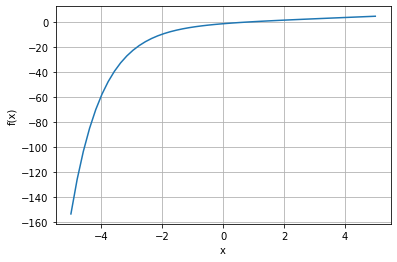

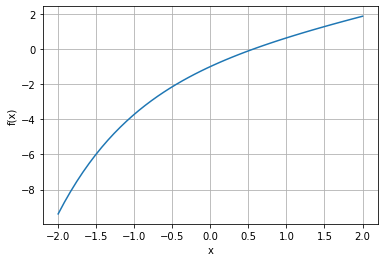

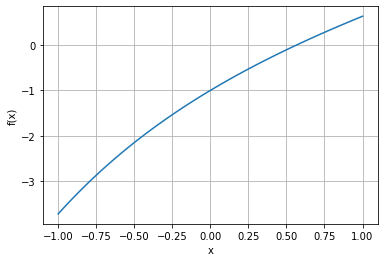

In [19]:
plot_function(np.linspace(-5,5), f1)
plot_function(np.linspace(-2,2), f1)
plot_function(np.linspace(-1,1), f1)

On peut constater que la fonction s'annule pour x compris entre 0.50 et 0.75. On applique différents points d'initialisation à la méthode de Newton dans cette région.

In [20]:
racinex = methode_de_Newton(0.53, f1, fprime1)
print(racinex)
racinex = methode_de_Newton(0.54, f1, fprime1)
print(racinex)
racinex = methode_de_Newton(0.55, f1, fprime1)
print(racinex)
racinex = methode_de_Newton(0.56, f1, fprime1)
print(racinex)
racinex = methode_de_Newton(0.57, f1, fprime1)
print(racinex)

TypeError: unsupported operand type(s) for /: 'float' and 'NoneType'

La méthode de Newton semble rencontrer des problèmes liés à la précision sur les nombres. On essaye la méthode de Dichotomie. En prenant 0.50 et 0.75 pour points d'initialisation.

In [ ]:
racinex = dichotomie(.50, 0.75, 0.01, f1)
print("", racinex)
racinex = dichotomie(.50, 0.75, 0.001, f1)
print("", racinex)
racinex = dichotomie(.50, 0.75, 0.0001, f1)
print("", racinex)
racinex = dichotomie(.50, 0.75, 0.00001, f1)
print("", racinex)
racinex = dichotomie(.50, 0.75, 0.000001, f1)
print("", racinex)
racinex = dichotomie(.50, 0.75, 0.0000001, f1)
print("", racinex)

La méthode de Dichotomie ne recontre pas de difficultés à résoudre l'équation. On a ainsi x = 0.566 pour solution à cette équation transcendante ce qui correspond aux résultats de la littérature.

In [ ]:
def f2(x):
    z = x - np.cos(x)
    return z

def fprime2(x):
    z = 1 + np.sin(x)
    return z


In [ ]:
plot_function(np.linspace(-5,5), f2)
plot_function(np.linspace(-2,2), f2)
plot_function(np.linspace(-1,1), f2)

Il y a une solution à proximité de 0.75. On teste la méthode de Newton.

In [ ]:
racinex = methode_de_Newton(0.5, f2, fprime2)
print(racinex)
racinex = methode_de_Newton(0.75, f2, fprime2)
print(racinex)

Avec la méthode de Dichotomie :

In [ ]:
racinex = dichotomie(.5, 0.75, 0.01, f2)
print("", racinex)
racinex = dichotomie(.50, 0.75, 0.001, f2)
print("", racinex)
racinex = dichotomie(.50, 0.75, 0.0001, f2)
print("", racinex)
racinex = dichotomie(.50, 0.75, 0.00001, f2)
print("", racinex)
racinex = dichotomie(.50, 0.75, 0.000001, f2)
print("", racinex)
racinex = dichotomie(.50, 0.75, 0.0000001, f2)
print("", racinex)

Pour cette équation, les deux méthodes convergent vers la solution. On remarque que malgré une tolérance epsilon très faible pour la méthode de Dichotomie, elle n'arrive pas à rattraper la méthode de Newton qui converge en seulement trois itérations. On gardera donc la solution donnée par la méthode de Newton et on en déduit que la solution à l'équation est x = 0.73908513.

On teste encore les méthodes avec d'autres exemples.

Soit l'équation : 

\begin{equation}
2^x - x² = 0
\end{equation}


In [ ]:
def f3(x):
    z = np.power(2,x) - np.power(x,2)
    return z

def fprime3(x):
    z = np.power(2, x-1) - 2*x
    return z

In [ ]:
plot_function(np.linspace(-5,5), f3)
plot_function(np.linspace(-2,2.2), f3)
plot_function(np.linspace(-2,0), f3)
plot_function(np.linspace(1,2), f3)
plot_function(np.linspace(3,4.5), f3)

On constate que l'équation a trois solutions à proximité de -1, 2 et de 4.

In [ ]:
racinex = methode_de_Newton(-0.8, f3, fprime3)
print(racinex)
racinex = methode_de_Newton(1.9, f3, fprime3)
print(racinex)
racinex = methode_de_Newton(3.9, f3, fprime3)
print(racinex)

In [ ]:
racinex = dichotomie(1.9, 2.1, 0.000000001, f3)
print("", racinex)
racinex = dichotomie(3.9, 4.1, 0.000000001, f3)
print("", racinex)
racinex = dichotomie(-1.2, -0.7, 0.0000001, f3)
print("", racinex)

On trouve avec les méthodes numériques, les solutions x1 = -0.7666647, x2 = 1.9998221, x3 = 2.00095785.

On résoud l'équation :

\begin{equation}
x - \sin(x) = 0
\end{equation}


In [ ]:
def f4(x):
    z = x - np.sin(x)
    return z

def fprime4(x):
    z = 1 - np.cos(x)
    return z

In [ ]:
plot_function(np.linspace(-5,5), f4)
plot_function(np.linspace(-1,1), f4)

Cette équation ne possède qu'une solution évidente en x = 0.

In [ ]:
racinex = methode_de_Newton(1, f4, fprime4)
print(racinex)
racinex = methode_de_Newton(0.5, f4, fprime4)
print(racinex)
racinex = methode_de_Newton(0.25, f4, fprime4)
print(racinex)
racinex = methode_de_Newton(0.15, f4, fprime4)
print(racinex)
racinex = methode_de_Newton(-5, f4, fprime4)
print(racinex)
racinex = methode_de_Newton(5, f4, fprime4)
print(racinex)

La méthode de Newton converge dans la plupart des cas vers la solution même si on observe parfois de la divergence.

In [ ]:
racinex = dichotomie(-1, 1, 0.0000000001, f4)
print("", racinex)
racinex = dichotomie(-1, 1, 0.000000000000001, f4)
print("", racinex)
racinex = dichotomie(-1, 1, 0.000000000000000001, f4)
print("", racinex)

Il faut vraiment imposer un epsilon très petit à la méthode de Dichotomie pour trouver un résultat cohérent. La méthode de Newton rencontre elle aussi des problèmes pour converger vers zéro. Cet exemple doit être un cas particulier de fonction posant des problèmes de convergence pour les méthodes numériques.

On prend l'équation : 

\begin{equation}
x -x^{1/x} = 0
\end{equation}



In [ ]:
def f5(x):
    a = 1/x
    z = x - np.power(x,a)
    return z

def fprime5(x):
    a = (1-x)/x
    b = np.power(x,2)
    z = 1 - np.power(x,a)/b
    return z

In [ ]:
plot_function(np.linspace(0,5), f5)
plot_function(np.linspace(0,2), f5)

Une solution en x = 0 et une solution x = 1. Le problème de cet exemple, c'est que la fonction n'étant pas définie pour les x négatifs, et que comme la fonction est strictement croissante de 0 à 1, il est impossible de trouver la solution x = 0 avec les deux méthodes.

In [ ]:
racinex = methode_de_Newton(0.90, f5, fprime5)
print(racinex)

In [ ]:
racinex = dichotomie(0.9, 1.1, 0.0000000001, f5)
print("", racinex)

## Calculs de racines avec la méthode de Newton

Une autre possibilité d'application de la méthode de Newton est la recherche de la n-ième racine d'un nombre. 

Si par exemple, on recherche la racine carré du nombre 2, on peut poser x^2 = 2 et la valeur de x vérifiant l'équation sera la racine. Il faut donc résoudre l'équation suivante pour trouver la racine :

\begin{equation}
x^2 - 2 = 0
\end{equation}

On retombe donc sur une équation polynomiale et il suffit de la résoudre pour trouver la racine du nombre 2. On peut dès alors étudier la fonction correspondant au polynôme et y appliquer la méthode des Newton :

\begin{equation}
f(x) =x^2 - 2
\end{equation}



In [ ]:
def f6(x):
    z = np.power(x,2) - 2
    return z

def fprime6(x):
    z = 2*x
    return z

In [ ]:
plot_function(np.linspace(-5,5), f6)
plot_function(np.linspace(-2,2), f6)

In [ ]:
racinex = methode_de_Newton(2, f6, fprime6)
print(racinex)
racinex = methode_de_Newton(-2, f6, fprime6)
print(racinex)

In [ ]:
racinex = dichotomie(1, 2, 0.0000000001, f6)
print("", racinex)
racinex = dichotomie(-2, -1, 0.0000000001, f6)
print("", racinex)

In [ ]:
s = (-2, 0, 1)
res = poly.polyroots(s)
print(res)

Comme on peut le voir, on peut retrouver facilement la valeurs des racines. On peut aussi appliquer les méthodes à des racines beaucoup plus compliquées à déterminer.

Exemples : 

\begin{equation}
f(x) = x^{16} - 105
\end{equation}


\begin{equation}
f(x) = x^{28} - 64
\end{equation}

In [ ]:
def f7(x):
    z = np.power(x,16) - 10
    return z

def fprime7(x):
    z = 16*np.power(x,15)
    return z

In [ ]:
plot_function(np.linspace(-50,50), f7)
plot_function(np.linspace(-2,2), f7)

In [ ]:
racinex = methode_de_Newton(2, f7, fprime7)
print(racinex)
racinex = methode_de_Newton(1.2, f7, fprime7)
print(racinex)
racinex = methode_de_Newton(1, f7, fprime7)
print(racinex)
racinex = methode_de_Newton(1, f7, fprime7)
print(racinex)
racinex = methode_de_Newton(-1, f7, fprime7)
print(racinex)

In [ ]:
racinex = dichotomie(-10, 10, 0.0000000001, f7)
print("", racinex)
racinex = dichotomie(-15, 15, 0.0000000001, f7)
print("", racinex)

In [ ]:
s = (-105, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 16) 
res = poly.polyroots(s)
print(res)

Dans cet exemple, la représentation graphique de la fonction considérée est très difficile à interpréter. Malgré tout, en recoupant les méthodes de Newton et de Dichotomie, on a pu trouver une valeur pour les racines et  vérifier que la racine sezième de 105 vaut plus ou moins 1.154.

In [ ]:
def f8(x):
    a = 28
    z = np.power(x,a) - 64
    return z

def fprime8(x):
    a = 28
    b = 27
    z = a*np.power(x,b)
    return z    

In [ ]:
racinex = methode_de_Newton(1.50, f8, fprime8)
print(racinex)
racinex = methode_de_Newton(1.12, f8, fprime8)
print(racinex)
racinex = methode_de_Newton(0.8, f8, fprime8)
print(racinex)

In [ ]:
racinex = dichotomie(-1, 2, 0.0000000001, f8)
print("", racinex)
racinex = dichotomie(-2, -1, 0.0000000001, f8)
print("", racinex)

En conclusion pour cette partie, la méthode de Newton permet de calculer des racines parfois très compliquées et difficiles à représenter graphiquement. Il y a toutefois assez souvent des problèmes d'instabillités numériques et la solution a tendance à diverger. 

La méthode de Dichotomie met beaucoup plus de temps à converger que la méthode de Newton, mais elle possède le grand avantage de ne jamais diverger. 

Si la méthode de Newton diverge régulièrement, c'est peut-être dû au fait qu'il s'agit d'un schéma explicite et comme tous les schémas explicites, il n'est stable que sous condition.

In [ ]:
s = (-105, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 16) 
res = poly.polyroots(s)
print(res)

## Recherche des minimums d'une fonction avec la méthode de Newton

Dans les parties précédentes, on a pu trouver les points d'annulation de fonctions grâce à la méthode de Newton qu'on a pu vérifier ensuite avec la méthode de Dichotomie.

Si la méthode de Newton permet de trouver ces points d'annulation, elle peut aussi être utilisée pour trouver les minimums d'une fonction. On sait en effet, que lorsque la dérivée d'une fonction s'annule en un point x, on est alors en la présence d'un extremum et si la dérivée seconde, est par ailleurs strictement positive de chaque côté de cet extremum, alors il s'agit du minimum d'une fonction.

La méthode de Newton, permet de trouver les minimums d'une fonction mais on peut aussi tout à fait l'appliquer à la dérivée première et seconde de la fonction. De cette manière, ce n'est plus les points d'annulations de la fonction que l'on résoud, mais les extremums de la fonction.

Il suffit donc de légérement modifier l'algorithme de la méthode de Newton pour lui faire faire chercher les points d'annulation de la dérivée première au lieu de la fonction pour les trouver.  

Il suffit simplement donc de remplacer la fonction par sa dérivée et la dérivée de la fonction par la dérivée seconde. On obtient alors l'algorithme suivant : 

\begin{equation}
x[i+1] = x[i] - \frac{f'(x[i])}{f''(x[i])}
\end{equation}

In [23]:
# Definition de l'algorithme modifié de la méthode de Newton
def methode_de_Newton_modifiee(xo,funcderive,funcderiveseconde):
    #initialisation de la méthode
    x = np.zeros(10)
    x[0] = xo
    for i in range(0,9):
        x[i+1] = x[i] - (funcderive(x[i]))/(funcderiveseconde(x[i]))
        x[i] = x[i+1]
        #print("", x)
    return x

La méthode de Dichotomie suit le même changement et au lieu de travailler avec le signe des fonctions, on travaille avev le signe de la dérivée des fonctions. L'algorithme devient :

In [24]:
# Definition de la méthode de Dichotomie

def dichotomie_modifiee(borne1, borne2, epsilon, funcderive):
    xg = borne1
    xd = borne2
    while (np.abs(xg-xd) >= epsilon):
        c = (xg+xd)/2.0
        prod = funcderive(xg)*funcderive(c)
        if prod > epsilon:
            xg = c
        else :
            if prod < epsilon:
                xd = c
    return c

On teste ces méthodes avec un exemple simple : 

\begin{equation}
f(x) = x²
\end{equation}

In [28]:
def f9(x):
    z = np.power(x,2)
    return z

def f9prime(x):
    z = 2*x
    return z

def f9primeprime(x):
    z = 2
    return z

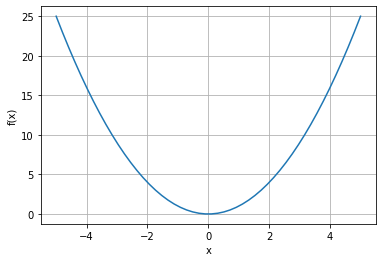

In [26]:
plot_function(np.linspace(-5,5), f9)

In [31]:
racinex = methode_de_Newton_modifiee(-1, f9prime, f9primeprime)
print(racinex)
racinex = methode_de_Newton_modifiee(1, f9prime, f9primeprime)
print(racinex)
racinex = methode_de_Newton_modifiee(-20, f9prime, f9primeprime)
print(racinex)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [33]:
racinex = dichotomie_modifiee(-1, 2, 0.0000000001, f9prime)
print("", racinex)
racinex = dichotomie_modifiee(-1, 2, 0.0000000000000000001, f9prime)
print("", racinex)

 -3.81460995413363e-06
 -1.4551915220235336e-10


En conclusion, on constate que l'algorithme modifié de Newton et de Dichotomie permettent bien de trouve aussi des minimums. On peut essayer d'appliquer ces méthodes à un cas plus compliqué :

\begin{equation}
2x^{4} - 5x^{2} + 7 = 0
\end{equation}

In [34]:
def f10(x):
    z = 2*np.power(x,4) - 5*np.power(x,2)+7
    return z

def f10prime(x):
    z = 8*np.power(x,3) - 10*x
    return z

def f10primeprime(x):
    z = 24*np.power(x,2)- 10
    return z

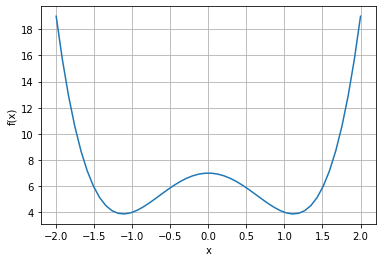

In [36]:
plot_function(np.linspace(-2,2), f10)

In [38]:
racinex = methode_de_Newton_modifiee(-1, f10prime, f10primeprime)
print(racinex)
racinex = methode_de_Newton_modifiee(1, f10prime, f10primeprime)
print(racinex)

[-1.14285714 -1.11881999 -1.11803482 -1.11803399 -1.11803399 -1.11803399
 -1.11803399 -1.11803399 -1.11803399 -1.11803399]
[1.14285714 1.11881999 1.11803482 1.11803399 1.11803399 1.11803399
 1.11803399 1.11803399 1.11803399 1.11803399]


In [41]:
racinex = dichotomie_modifiee(-2, -0.5, 0.0000000001, f10prime)
print("", racinex)
racinex = dichotomie_modifiee(0.8, 2, 0.0000000001, f10prime)
print("", racinex)

 -1.118034422310302
 1.1180335999233646


En conclusion, l'algorithme modifié de Newton et de Dichotomie permettent aussi de trouver les minimums d'une fonction. On pourrait par exemple se servir de ces méthodes pour faire de l'optimisation de fonction.

# Conclusion

En conclusion, la méthode de Newton a prouvé qu'elle pouvait être très efficace pour résoudre des équations polynomiales grâce à sa convergence quadratique. Cependant, elle peut diverger lorsque le point d'initialisation est trop éloigné de la solution.

Surtout, elle utilise la dérivée de la fonction dans un ratio ce qui peut poser des problèmes lorsque la dérivée s'annule ou se rapproche dangereusement de zéro. Dans le premier cas, le problème de la division par zéro se pose et la méthode de Newton est tout simplement non définie. Dans le second cas, en raison de problèmes liés à la représentation des nombres dans la machine, les valeurs sont approximées comme étant égales à zéro ce qui nous ramène au premier cas.

Il est donc toujours important de coupler la méthode de Newton avec une méthode analogue, plus simple et plus robuste comme la méthode de Dichotomie pour résoudre en parallèle les équations au cas où la méthode de Newton aurait des problèmes. On a comme quand même pu voir que la méthode de Dichotomie nécessite une tolérance epsilon très faible pour atteindre les ordres de convergence de la méthode de Newton.


Il n'a pas été possible de tester la méthode de la sécante en raison de problèmes liés à l'algorithme et toujours résolus à ce jour. Il aurait été intéressant de voir comment celle-ci se positionne entre la méthode de Newton et de Dichotomie pour la convergence.

La Built-in function est quand à elle assez décevante puisque les résultats qu'elle donnent sont moins précis que les méthodes approchées itératives développées et utilisées ici.

# Annexes

Tentative de résolution de l'équation transcendante : 

\begin{equation}
x - x^{\pi} = 0
\end{equation}


Mais la fonction numpy ne tolère que des exposants entiers. Il est impossible donc de résoudre cette équation. De plus, il semblerait que les solutions soient complexes.

In [ ]:
pi = 3.14

def f1(x):
    z = x - np.power(x,pi)
    return z

def fprime_1(x):
    z = 1 - pi*np.power(x, pi-1)
    
plot_function(np.linspace(-10,10), f1)

In [ ]:
racinex = methode_de_Newton(0.5, f1, fprime_1)
print(racinex)

Tentative de résolution de l'équation transcendante : 

\begin{equation}
2^{x} - x^{2} = 0
\end{equation}


Mais la fonction numpy ne tolère pas ce genre d'exposant

In [ ]:
def f4(x):
    z = np.power(2,x) - np.power(x,2)
    return z

def fprime4(x):
    z = np.power(2, x-1) + 2*x
    return z

In [ ]:
plot_function(np.linspace(-5,5), f4)
plot_function(np.linspace(-2,2), f4)
racinex = methode_de_Newton(4, f4, fprime4)
print(racinex)
racinex = methode_de_Newton(2, f4, fprime4)
print(racinex)
racinex = methode_de_Newton(-0.767, f4, fprime4)
print(racinex)

Une autre idée que j'avais eu, était de résoudre des ratios de fonctions de Bessel, mais je n'ai pas réussi à trouver suffisamment d'informations sur le net pour le faire.